In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [ ]:
data = pd.read_csv("/content/project-data.csv")
display(data.head(), data.shape)

,project,risk,status,compliance,report_count,has_schedule,scope,office,month,year,day,risk_previous1,risk_previous2,risk_previous3,project_risk_likelihood,estimated_days_finish,report_word_count,poa_word_count,manager_risk_likelihood,manager_project_count
0,12a652ab71e10606d7dc806bdba8ef2f3d5ac8a7,0,activity,0.9692,12,1,Sectorial,SECOM,7,2015,17.13933,0,0,0,0.009009,206.89418,66.348228,24.486903,0.011364,1
1,c5336c675e3425234600d241339736ed3301e6d5,0,external dependency,0.8000,8,1,Sectorial,DIRAD,10,2015,17.13933,0,0,0,0.012500,206.89418,30.000000,77.000000,0.014599,1
2,c5336c675e3425234600d241339736ed3301e6d5,0,external dependency,0.8000,8,1,Sectorial,DIRAD,11,2015,6.00000,0,0,0,0.010870,237.00000,85.000000,1.000000,0.012422,1
3,c5336c675e3425234600d241339736ed3301e6d5,0,external dependency,0.8000,8,1,Sectorial,DIRAD,12,2015,18.00000,0,0,0,0.009662,195.00000,114.000000,1.000000,0.010870,2
4,c5336c675e3425234600d241339736ed3301e6d5,0,external dependency,0.8000,8,1,Sectorial,DIRAD,12,2015,8.00000,0,0,0,0.009662,205.00000,103.000000,54.000000,0.010870,2


(1022, 20)

# Pre-proccessing

In [ ]:
# Data Preprocessing
# Remove irrelevant columns (assuming 'project' is not relevant for prediction)
data = pd.read_csv('project-data.csv')
data = data.drop(columns=["project"])
# encoding categorical data
data = pd.concat([data, pd.get_dummies(data.status)], axis=1)
data = pd.concat([data, pd.get_dummies(data.office.str.lower())], axis=1)

# filling missing values
data['compliance'].fillna(data['compliance'].mean(), inplace=True)
data['report_count'].fillna(data['report_count'].mean(), inplace=True)

In [ ]:
# Handle missing values (if any)
data = data.dropna()

In [ ]:
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data)
display(data.head(), data.shape)

,risk,compliance,report_count,has_schedule,month,year,day,risk_previous1,risk_previous2,risk_previous3,...,scope_Sectorial,scope_Structuring,scope_corporate,office_CENIN,office_DG,office_DILEG,office_DIRAD,office_DRH,office_SECOM,office_corporate
0,0,0.9692,12,1,7,2015,17.13933,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0.8000,8,1,10,2015,17.13933,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0.8000,8,1,11,2015,6.00000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0.8000,8,1,12,2015,18.00000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0.8000,8,1,12,2015,8.00000,0,0,0,...,1,0,0,0,0,0,1,0,0,0


(1022, 57)

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
# standardization
numerical_features = ['day', 'report_word_count', 'poa_word_count', 'compliance',
                      'estimated_days_finish', 'manager_risk_likelihood', 'manager_project_count',
                      'project_risk_likelihood', 'report_count']
# Filter rows with 'risk' equal to -1
data = data[data['risk'] != -1]

std_scale = StandardScaler().fit(data[numerical_features])
features_scaled = pd.DataFrame(std_scale.transform(data[numerical_features]),
                           columns=numerical_features, index=data.index)
data = pd.concat([data[data.columns.drop(numerical_features)], features_scaled], axis=1)

display(data.head(), data.shape)
len(data)

,risk,has_schedule,month,year,risk_previous1,risk_previous2,risk_previous3,activity,canceled,external dependency,...,office_corporate,day,report_word_count,poa_word_count,compliance,estimated_days_finish,manager_risk_likelihood,manager_project_count,project_risk_likelihood,report_count
0,0,1,7,2015,0,0,0,1,0,0,...,0,-0.018607,-0.000629,0.018557,0.605389,0.023875,-0.953049,-0.779154,-0.668043,-0.238965
1,0,1,10,2015,0,0,0,0,0,1,...,0,-0.018607,-0.416939,1.959795,-0.424186,0.023875,-0.722375,-0.779154,-0.339420,-0.672709
2,0,1,11,2015,0,0,0,0,0,1,...,0,-1.269250,0.212997,-0.849678,-0.424186,0.054405,-0.877554,-0.779154,-0.492901,-0.672709
3,0,1,12,2015,0,0,0,0,0,1,...,0,0.078023,0.545145,-0.849678,-0.424186,0.011814,-0.988280,-0.035557,-0.606590,-0.672709
4,0,1,12,2015,0,0,0,0,0,1,...,0,-1.044705,0.419158,1.109560,-0.424186,0.021954,-0.988280,-0.035557,-0.606590,-0.672709


(962, 57)

962

In [ ]:
# Assuming data is a pandas DataFrame object
data_columns = data.columns
half_length = len(data_columns) // 2  # Calculate the half length of columns

# Iterate over the first half of columns and print side by side
for i in range(half_length):
    print(f'{data_columns[i]:<20s} {data_columns[i + half_length]}')

# If the number of columns is odd, print the last column header in a separate row
if len(data_columns) % 2 != 0:
    print(f'{data_columns[-1]}')

risk                 status_external dependency
has_schedule         status_in closing stage
month                status_in external dependency
year                 status_in progress
risk_previous1       status_late
risk_previous2       status_no information
risk_previous3       status_no report
activity             status_not started
canceled             status_processing for hiring
external dependency  status_suspensed
in closing stage     scope_Sectorial
in external dependency scope_Structuring
in progress          scope_corporate
late                 office_CENIN
no information       office_DG
no report            office_DILEG
not started          office_DIRAD
processing for hiring office_DRH
suspensed            office_SECOM
cenin                office_corporate
corporate            day
dg                   report_word_count
dileg                poa_word_count
dirad                compliance
drh                  estimated_days_finish
secom                manager_risk_likelihood
s

In [ ]:
# Split the data into training and test sets
from imblearn.over_sampling import SMOTE
x = data.drop(columns=["risk"])
y = data["risk"]
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled )

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.43      0.54       236
           1       0.56      0.82      0.66       207

    accuracy                           0.61       443
   macro avg       0.64      0.62      0.60       443
weighted avg       0.65      0.61      0.60       443

Confusion Matrix:
[[101 135]
 [ 38 169]]


In [ ]:
# Interpret the Model
coefficients = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

                          Feature  Coefficient
0                    has_schedule    -0.424077
1                           month     0.046602
2                            year     0.001547
3                  risk_previous1     1.643027
4                  risk_previous2    -1.476900
5                  risk_previous3    -0.214565
6                        activity    -0.116554
7                        canceled    -1.151149
8             external dependency    -0.398606
9                in closing stage    -0.131508
10         in external dependency     0.074629
11                    in progress    -0.568242
12                           late     0.011772
13                 no information     0.000000
14                      no report    -1.457590
15                    not started    -1.758884
16          processing for hiring    -0.466332
17                      suspensed    -0.212424
18                          cenin    -0.521153
19                      corporate    -0.741155
20           

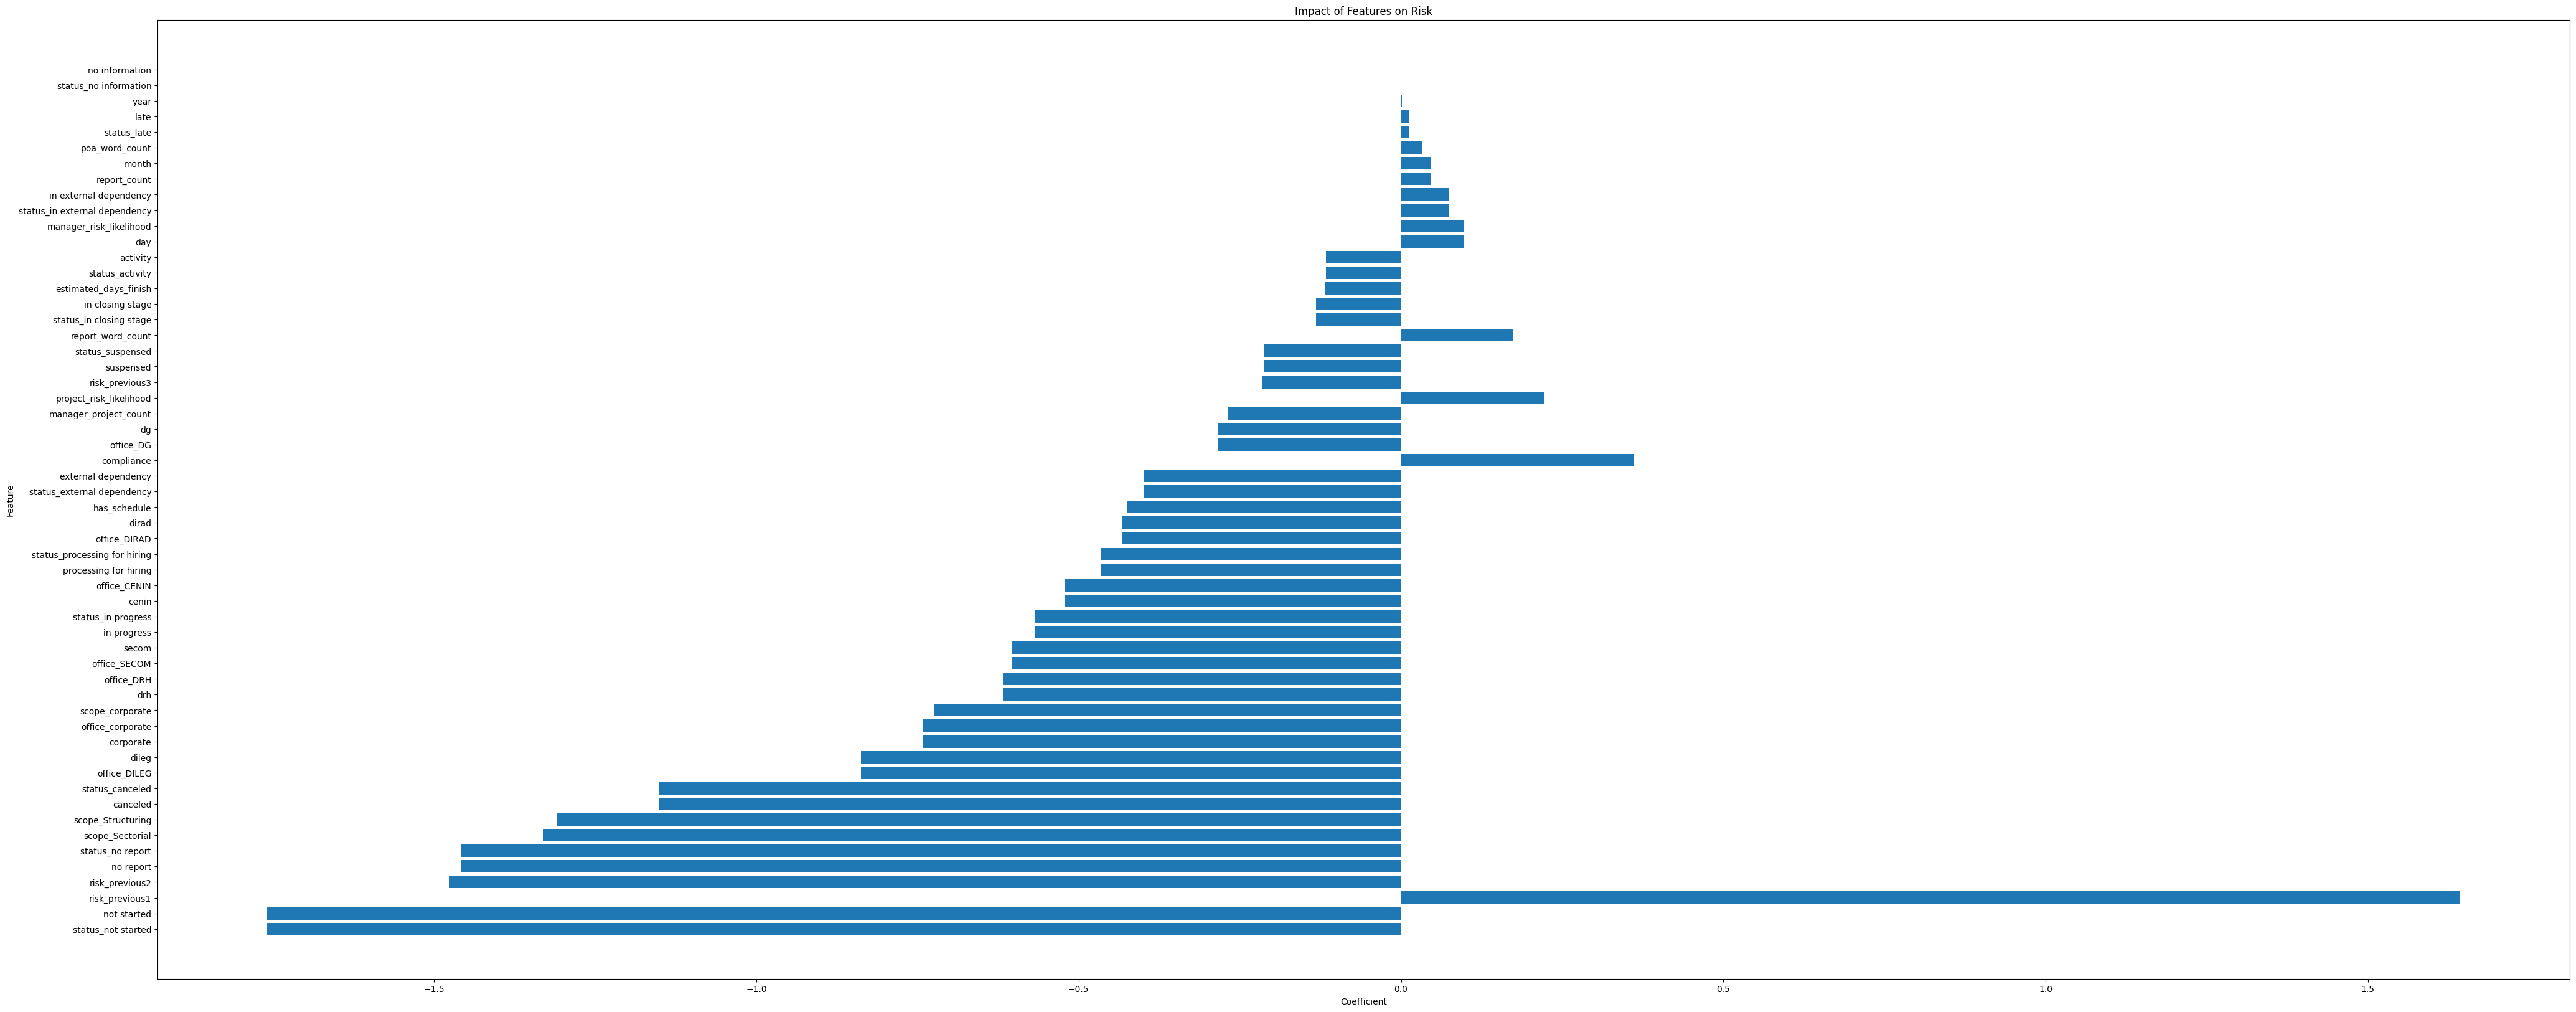

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'coefficients' containing the feature names and coefficients
# Sort the coefficients by magnitude (absolute value)
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(50,20))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Impact of Features on Risk')
plt.show()


In [ ]:
# Create a table to show the values of y_test and y_pred
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
print(results)


      y_test  y_pred
1125       1       1
184        0       0
1226       1       1
67         0       1
220        1       0
...      ...     ...
323        0       1
898        0       1
1114       1       1
575        1       1
135        1       0

[443 rows x 2 columns]


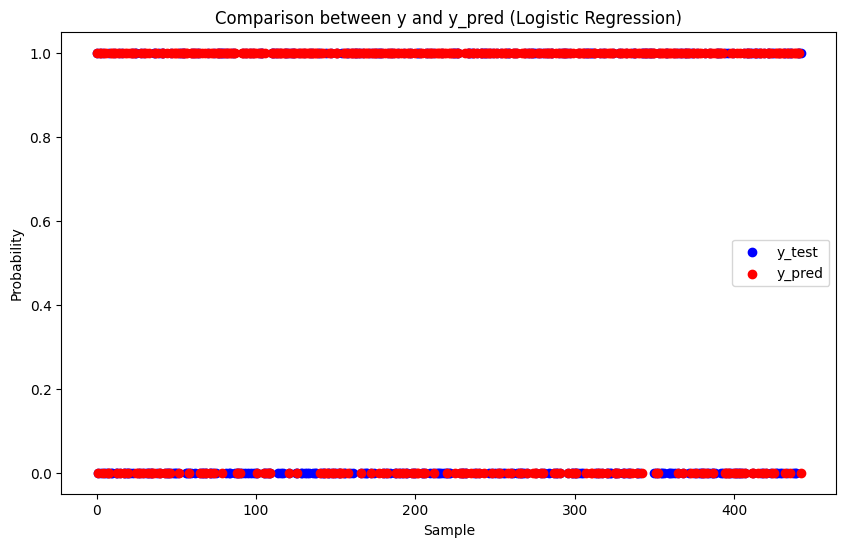

In [ ]:
import matplotlib.pyplot as plt
# Create a plot to visualize y_test and y_pred
plt.rcParams['figure.figsize'] = [10, 6]
plt.scatter(range(len(y_test)), y_test, color='b', label='y_test')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='y_pred')


plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Comparison between y and y_pred (Logistic Regression)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have predicted labels in y_pred and true labels in y_test

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6094808126410836


True Positives: 101
True Negatives: 135
False Positives: 38
False Negatives: 169


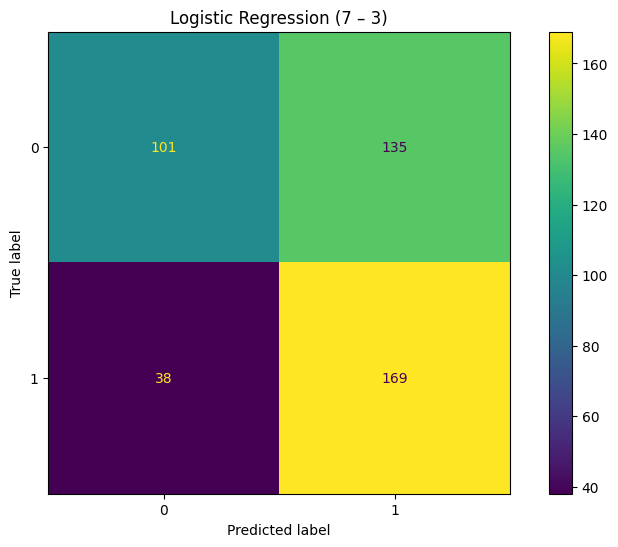

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report

#Use confusion matrix to evaluate model
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
TP = cm[0, 0]
TN = cm[0, 1]
FP = cm[1, 0]
FN = cm[1, 1]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plt.title("Logistic Regression (7 – 3)")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# Assuming you have true target values in y_test and predicted target values in y_pred

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Perform cross-validation
cv_scores = cross_val_score(model,x, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print("Cross-Validation RMSE:", rmse_cv)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

RMSE: 0.6249153441538434
Cross-Validation RMSE: 0.5925514559759976
MAE: 0.3905191873589165
R-squared: -0.5687996397281581


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming your dataset is in a DataFrame named 'data'
# Assuming you have the target variable 'risk' and the feature variables in separate dataframes X and y

# Create an instance of logistic regression
logreg = LogisticRegression()

# Create an instance of RFE
rfe = RFE(estimator=logreg, n_features_to_select=5)

# Fit RFE on the feature variables
rfe.fit(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['risk_previous1', 'canceled', 'not started', 'status_canceled',
       'status_no report'],
      dtype='object')


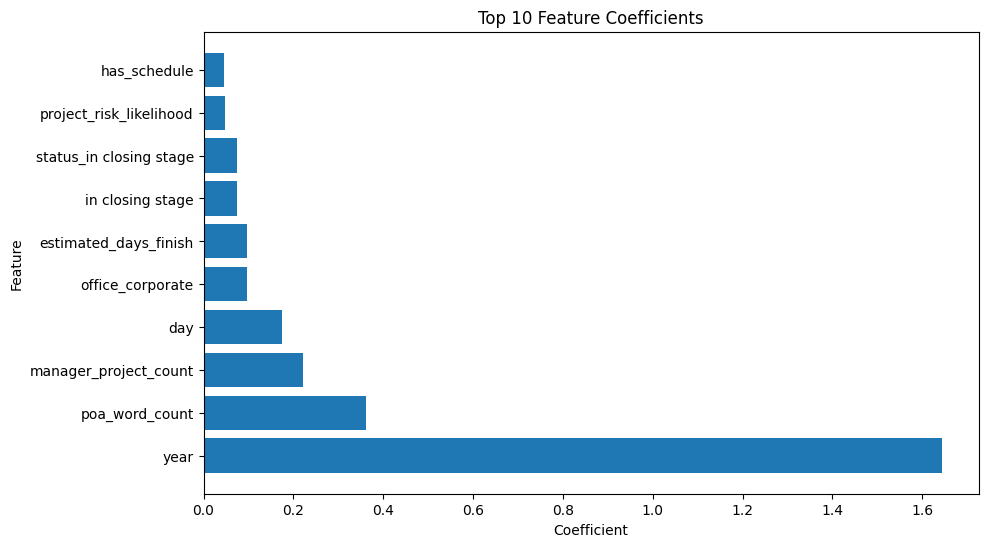

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'model'
# Assuming you have a DataFrame named 'data' containing the feature data

# Get the coefficients from the model
coefficients = model.coef_[0]

# Create a DataFrame to store the feature names and coefficients
feature_coefficients = pd.DataFrame({
    'Feature': data.columns[:-1],  # Exclude the last feature
    'Coefficient': coefficients
})

# Sort the feature coefficients in descending order
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Select the top N features
top_n = 10  # Number of top features to display
top_features = feature_coefficients.head(top_n)

# Plot the top features and their coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Coefficients')
plt.show()


In [ ]:
data.columns

Index(['risk', 'has_schedule', 'month', 'year', 'risk_previous1',
       'risk_previous2', 'risk_previous3', 'activity', 'canceled',
       'external dependency', 'in closing stage', 'in external dependency',
       'in progress', 'late', 'no information', 'no report', 'not started',
       'processing for hiring', 'suspensed', 'cenin', 'corporate', 'dg',
       'dileg', 'dirad', 'drh', 'secom', 'status_activity', 'status_canceled',
       'status_external dependency', 'status_in closing stage',
       'status_in external dependency', 'status_in progress', 'status_late',
       'status_no information', 'status_no report', 'status_not started',
       'status_processing for hiring', 'status_suspensed', 'scope_Sectorial',
       'scope_Structuring', 'scope_corporate', 'office_CENIN', 'office_DG',
       'office_DILEG', 'office_DIRAD', 'office_DRH', 'office_SECOM',
       'office_corporate', 'day', 'report_word_count', 'poa_word_count',
       'compliance', 'estimated_days_finish', 'manag

In [ ]:
coefficients

array([-4.24076561e-01,  4.66023065e-02,  1.54686167e-03,  1.64302740e+00,
       -1.47690009e+00, -2.14564834e-01, -1.16554309e-01, -1.15114950e+00,
       -3.98605829e-01, -1.31507725e-01,  7.46292859e-02, -5.68241936e-01,
        1.17719926e-02,  0.00000000e+00, -1.45759037e+00, -1.75888396e+00,
       -4.66331637e-01, -2.12424331e-01, -5.21153007e-01, -7.41154922e-01,
       -2.84767127e-01, -8.37939894e-01, -4.33041742e-01, -6.17367012e-01,
       -6.03495217e-01, -1.16554309e-01, -1.15114950e+00, -3.98605829e-01,
       -1.31507725e-01,  7.46292859e-02, -5.68241936e-01,  1.17719926e-02,
        0.00000000e+00, -1.45759037e+00, -1.75888396e+00, -4.66331637e-01,
       -2.12424331e-01, -1.33007665e+00, -1.30880480e+00, -7.24716385e-01,
       -5.21153007e-01, -2.84767127e-01, -8.37939894e-01, -4.33041742e-01,
       -6.17367012e-01, -6.03495217e-01, -7.41154922e-01,  9.72642323e-02,
        1.73783067e-01,  3.20747897e-02,  3.61628390e-01, -1.18273345e-01,
        9.69238995e-02, -